In [9]:
import os
os.chdir('/content/drive/MyDrive/21-1/Computational Physics')

In [1]:
#역행렬
#반복 방법
# 공약 경사법

In [2]:
import numpy as np


In [3]:
A=np.array([[0.6,-0.4,1.0],
            [-0.3,0.2,0.5],
            [0.6,-1.0,0.5]])

In [4]:
A

array([[ 0.6, -0.4,  1. ],
       [-0.3,  0.2,  0.5],
       [ 0.6, -1. ,  0.5]])

In [6]:
B=np.eye(3)

In [10]:
from ch2 import *

In [11]:
Acopy=A.copy()
LU,seq=LUdecompp(Acopy)
x0=LUsolvee(LU,B[:,0],seq)
x1=LUsolvee(LU,B[:,1],seq)
x2=LUsolvee(LU,B[:,2],seq)
#x는 A의 역행렬copy=A.copy()
LU,seq=LUdecompp(Acopy)
x0=LUsolvee(LU,B[:,0],seq)
x1=LUsolvee(LU,B[:,1],seq)
x2=LUsolvee(LU,B[:,2],seq)
#x는 A의 역행렬
x=np.array([x0,x1,x2]).T
x=np.array([x0,x1,x2]).T

In [12]:
x

array([[ 1.66666667, -2.22222222, -1.11111111],
       [ 1.25      , -0.83333333, -1.66666667],
       [ 0.5       ,  1.        ,  0.        ]])

In [13]:
A@x

array([[ 1.00000000e+00, -4.44089210e-16, -1.18423789e-16],
       [ 0.00000000e+00,  1.00000000e+00,  5.92118946e-17],
       [ 0.00000000e+00, -3.33066907e-16,  1.00000000e+00]])

In [ ]:
n=len(Acopy)
x=np.zeros((n,n))
for i in range(n):
  x[:i]=LUsolve(LU,B[:.i],seq)
print(x)

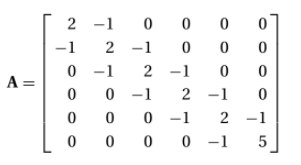

In [47]:
#A역행렬 구하기
#A@X=I(B)
c=-np.ones(5)
d=2*np.ones(6)
d[5]=5
e=-np.ones(5)

In [48]:
B=np.eye(6)

In [49]:
c,d,e=LUdecomp3(c,d,e)

In [44]:
n=6
x=np.zeros((n,n))
for i in range(n):
  x[:,i]=LUsolve3(c,d,e,B[:,i])

In [45]:
x

array([[0.84, 0.68, 0.52, 0.36, 0.2 , 0.04],
       [0.68, 1.36, 1.04, 0.72, 0.4 , 0.08],
       [0.52, 1.04, 1.56, 1.08, 0.6 , 0.12],
       [0.36, 0.72, 1.08, 1.44, 0.8 , 0.16],
       [0.2 , 0.4 , 0.6 , 0.8 , 1.  , 0.2 ],
       [0.04, 0.08, 0.12, 0.16, 0.2 , 0.24]])

In [50]:
LUsolve3(c,d,e,B)

array([[0.84, 0.68, 0.52, 0.36, 0.2 , 0.04],
       [0.68, 1.36, 1.04, 0.72, 0.4 , 0.08],
       [0.52, 1.04, 1.56, 1.08, 0.6 , 0.12],
       [0.36, 0.72, 1.08, 1.44, 0.8 , 0.16],
       [0.2 , 0.4 , 0.6 , 0.8 , 1.  , 0.2 ],
       [0.04, 0.08, 0.12, 0.16, 0.2 , 0.24]])

In [34]:
A=np.diag(c,k=-1)+np.diag(d,k=0)+np.diag(e,k=1)

In [36]:
np.linalg.inv(A)

array([[0.84, 0.68, 0.52, 0.36, 0.2 , 0.04],
       [0.68, 1.36, 1.04, 0.72, 0.4 , 0.08],
       [0.52, 1.04, 1.56, 1.08, 0.6 , 0.12],
       [0.36, 0.72, 1.08, 1.44, 0.8 , 0.16],
       [0.2 , 0.4 , 0.6 , 0.8 , 1.  , 0.2 ],
       [0.04, 0.08, 0.12, 0.16, 0.2 , 0.24]])

In [ ]:
#iterative matrix


In [52]:
w=1
A=np.array([[4.,-1,1],
           [-1,4,-2],
           [1,-2,4]],dtype=float)
b=np.array([12,-1,5])
x=np.zeros(3)
#여러번 반복하면 답으로 수렴한다
x[0]=(w/A[0,0])*(b[0]-(A[0,1]*x[1]+A[0,2]*x[2]))
x[1]=(w/A[1,1])*(b[1]-(A[1,0]*x[0]+A[1,2]*x[2]))
x[2]=(w/A[2,2])*(b[2]-(A[2,0]*x[0]+A[2,1]*x[1]))

x

array([3.  , 0.5 , 0.75])

In [53]:
np.linalg.solve(A,b)

array([3., 1., 1.])

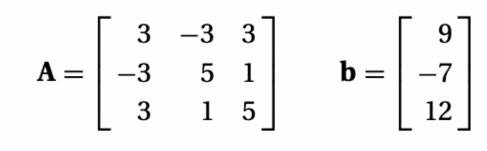

In [83]:
x=2*np.ones(3)

In [87]:
x[0]=(w/3)*(9-(-3*x[1]+3*x[2]))
x[1]=(w/5)*(-7-(-3*x[0]+1*12))
x[2]=(w/5)*(12-(3*x[0]+1*x[1]))
x

array([-9.1872  , -9.31232 ,  9.774784])

In [100]:
A=np.array([[4.,-1,1],
           [-1,4,-2],
           [1,-2,4]],dtype=float)
b=np.array([12,-1,5])
x0=np.zeros(3)

In [103]:
#First iteration
r0=b-A@x0
s0=r0.copy()
a0=s0@r0/(s0@A@s0)

x1=x0+a0*s0
print(x1)

#second iter
r1=b-A@x1 
b0=-r1@A@s0/(s0@A@s0)
s1=r1+b0*s0
a1=s1@r1/(s1@A@s1)
x2=x1+a1*s1
print(x2)


[ 2.41706161 -0.2014218   1.007109  ]
[3.07752283 0.79483181 0.71998218]


In [104]:
A=np.array([[3.,-3,3],
            [-3,5,1],
            [3,1,5]])
b=np.array([9,-7,12])
x0=np.zeros(3)

In [106]:
np.linalg.solve(A,b)

array([3.5       , 0.66666667, 0.16666667])

In [107]:
#First iteration
r0=b-A@x0
s0=r0.copy()
a0=s0@r0/(s0@A@s0)

x1=x0+a0*s0
print(x1)

#second iter
r1=b-A@x1 
b0=-r1@A@s0/(s0@A@s0)
s1=r1+b0*s0
a1=s1@r1/(s1@A@s1)
x2=x1+a1*s1
print(x2)

r2=b-A@x2 
b1=-r2@A@s1/(s1@A@s1)
s2=r2+b1*s1
a2=s2@r2/(s2@A@s2)
x3=x2+a2*s2
print(x3)

[ 1.19361084 -0.92836399  1.59148112]
[ 18.34439265   3.8788959  -13.41230235]
[3.5        0.66666667 0.16666667]
